#SCENARIO 1 – MULTINOMIAL NAÏVE BAYES - BY ROHITH JOHN 24BAD100

##Problem Statement
Classify SMS messages as Spam or Ham (Not Spam)..

**Dataset (Kaggle – Public):**
[DATASET LINK](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

**Target Variable:** Message Label (Spam / Ham)

**Input Feature:** SMS Text Messages


Rohith John 24BAD100


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--- Model Evaluation ---
Accuracy:  0.9785
Precision: 1.0000
Recall:    0.8400
F1 Score:  0.9130

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

--- Misclassified Examples ---
Actual: Spam | Predicted: Ham
Message: Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+

Actual: Spam | Predicted: Ham
Message: Loans for any purpose even if you have Bad Credit! Tenants Welcome. Call NoWorriesLoans.com on 08717111821

Actual: Spam | Predicted: Ham
Message: tddnewsletter@emc1.co.uk (More games from TheDailyDraw) Dear Helen, Dozens of Free Games - with great prizesWith..

Actual: Spam | Predi

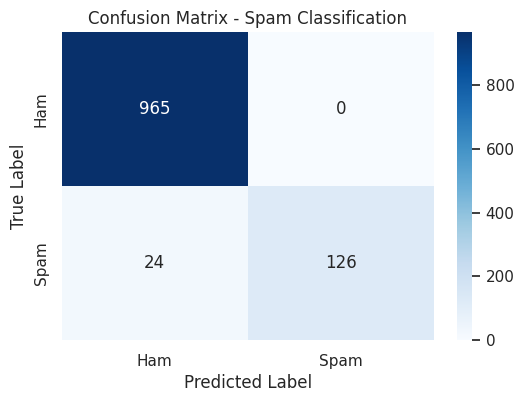

/tmp/ipython-input-3474898067.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_spam_probs, y=top_20_spam_words, palette='Reds_r')


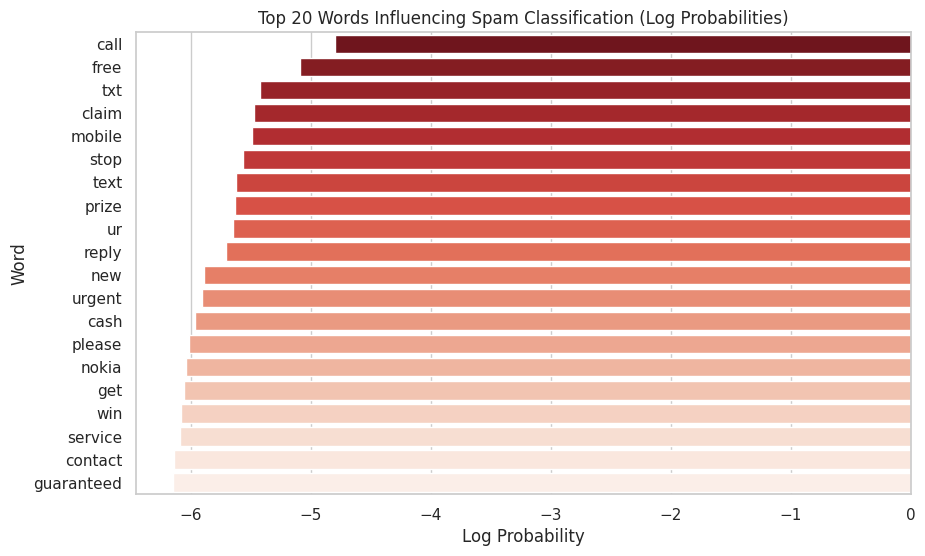

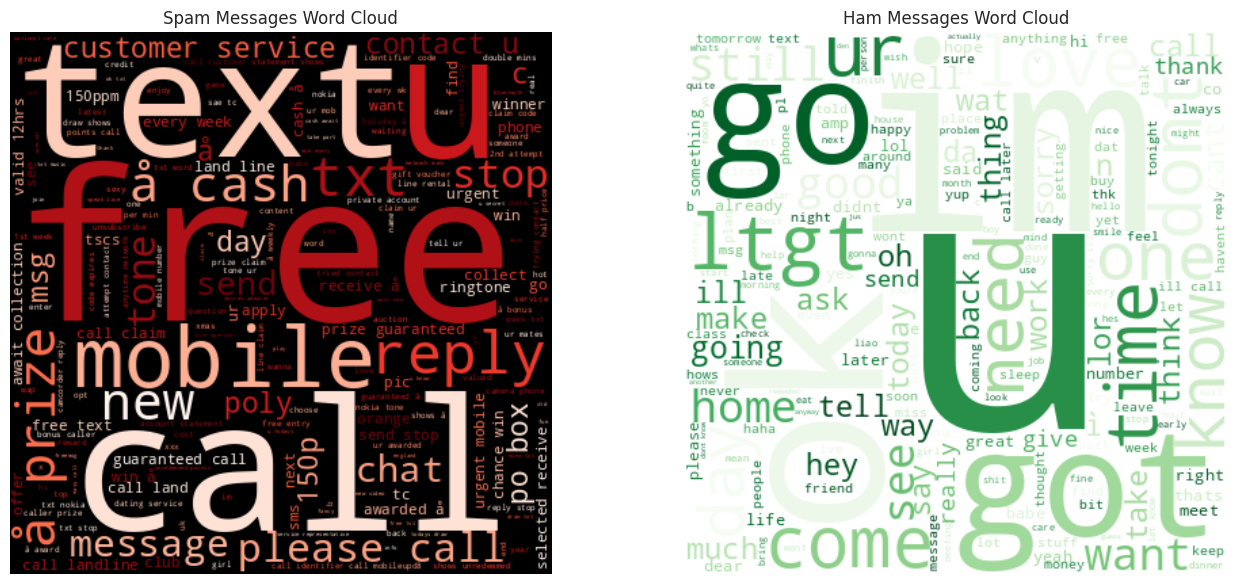

In [5]:
# TASK 1: Import required Python libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from wordcloud import WordCloud
print("Rohith John 24BAD100")
# Download stopwords (only needed once)
nltk.download('stopwords')

# TASK 2: Load the SMS Spam dataset
# The dataset often has encoding issues, 'latin-1' works best here
df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only necessary columns and rename them for clarity
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# TASK 5: Encode target labels (Moved up for cleaner DataFrame)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# TASK 3: Perform data preprocessing
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Punctuation removal
    text = "".join([char for char in text if char not in string.punctuation])
    # 3. Stopword removal
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['clean_message'] = df['message'].apply(preprocess_text)

# TASK 4 & 6: Feature Extraction & Train/Test Split
# We will use TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(max_features=3000) # Limiting to top 3000 words
X = vectorizer.fit_transform(df['clean_message'])
y = df['label_num']

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TASK 7 & 8: Train Model & Predict
# Default Laplace smoothing is alpha=1.0
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)

# Predict classes
y_pred = mnb.predict(X_test)

# TASK 9: Evaluate performance
print("--- Model Evaluation ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# TASK 10: Analyze misclassified examples
print("--- Misclassified Examples ---")
# Get indices of incorrect predictions
incorrect_indices = y_test.index[y_test != y_pred]
misclassified_df = df.loc[incorrect_indices]
# Show the first 5 misclassified messages
for idx, row in misclassified_df.head(5).iterrows():
    actual = "Spam" if row['label_num'] == 1 else "Ham"
    predicted = "Ham" if actual == "Spam" else "Spam" # since it's misclassified
    print(f"Actual: {actual} | Predicted: {predicted}")
    print(f"Message: {row['message']}\n")

# TASK 11: Apply Laplace smoothing and observe impact
print("--- Laplace Smoothing Impact ---")
alphas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
for a in alphas:
    temp_mnb = MultinomialNB(alpha=a)
    temp_mnb.fit(X_train, y_train)
    temp_pred = temp_mnb.predict(X_test)
    acc = accuracy_score(y_test, temp_pred)
    print(f"Alpha: {a:5.2f} | Accuracy: {acc:.4f}")

# VISUALIZATIONS

# 1. Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Spam Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Feature Importance (Top words influencing spam classification)
# MNB stores log probabilities of features given a class
spam_log_probs = mnb.feature_log_prob_[1]
feature_names = vectorizer.get_feature_names_out()

# Zip features with their probabilities and sort
spam_features = sorted(zip(feature_names, spam_log_probs), key=lambda x: x[1], reverse=True)
top_20_spam_words = [x[0] for x in spam_features[:20]]
top_20_spam_probs = [x[1] for x in spam_features[:20]]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_spam_probs, y=top_20_spam_words, palette='Reds_r')
plt.title('Top 20 Words Influencing Spam Classification (Log Probabilities)')
plt.xlabel('Log Probability')
plt.ylabel('Word')
plt.show()

# 3. Word frequency comparison (Spam vs Ham) using WordClouds
spam_words = " ".join(df[df['label'] == 'spam']['clean_message'])
ham_words = " ".join(df[df['label'] == 'ham']['clean_message'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
wc_spam = WordCloud(width=400, height=400, background_color='black', colormap='Reds').generate(spam_words)
plt.imshow(wc_spam, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
wc_ham = WordCloud(width=400, height=400, background_color='white', colormap='Greens').generate(ham_words)
plt.imshow(wc_ham, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

#SCENARIO 2 – GAUSSIAN NAÏVE BAYES

**Problem Statement**
Classify flower species based on physical measurements.

**Dataset (Public / Standard Dataset)**

Iris Dataset (sklearn)

**Target Variable:**
 Flower Species

**Input Features**

• Sepal Length

• Sepal Width

• Petal Length

• Petal Width


Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_num species_name  
0            0       setosa  
1            0       setosa  
2            0       setosa  
3            0       setosa  
4            0       setosa   

--- Model Evaluation ---
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.9

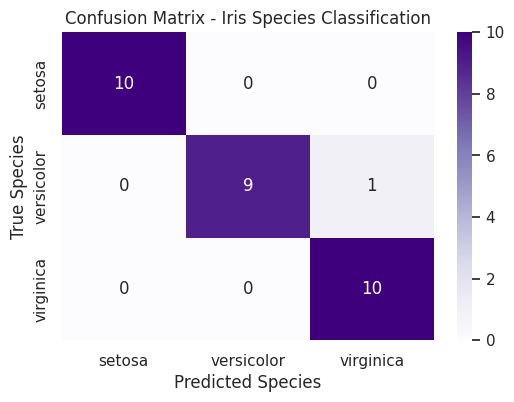

<Figure size 800x800 with 0 Axes>

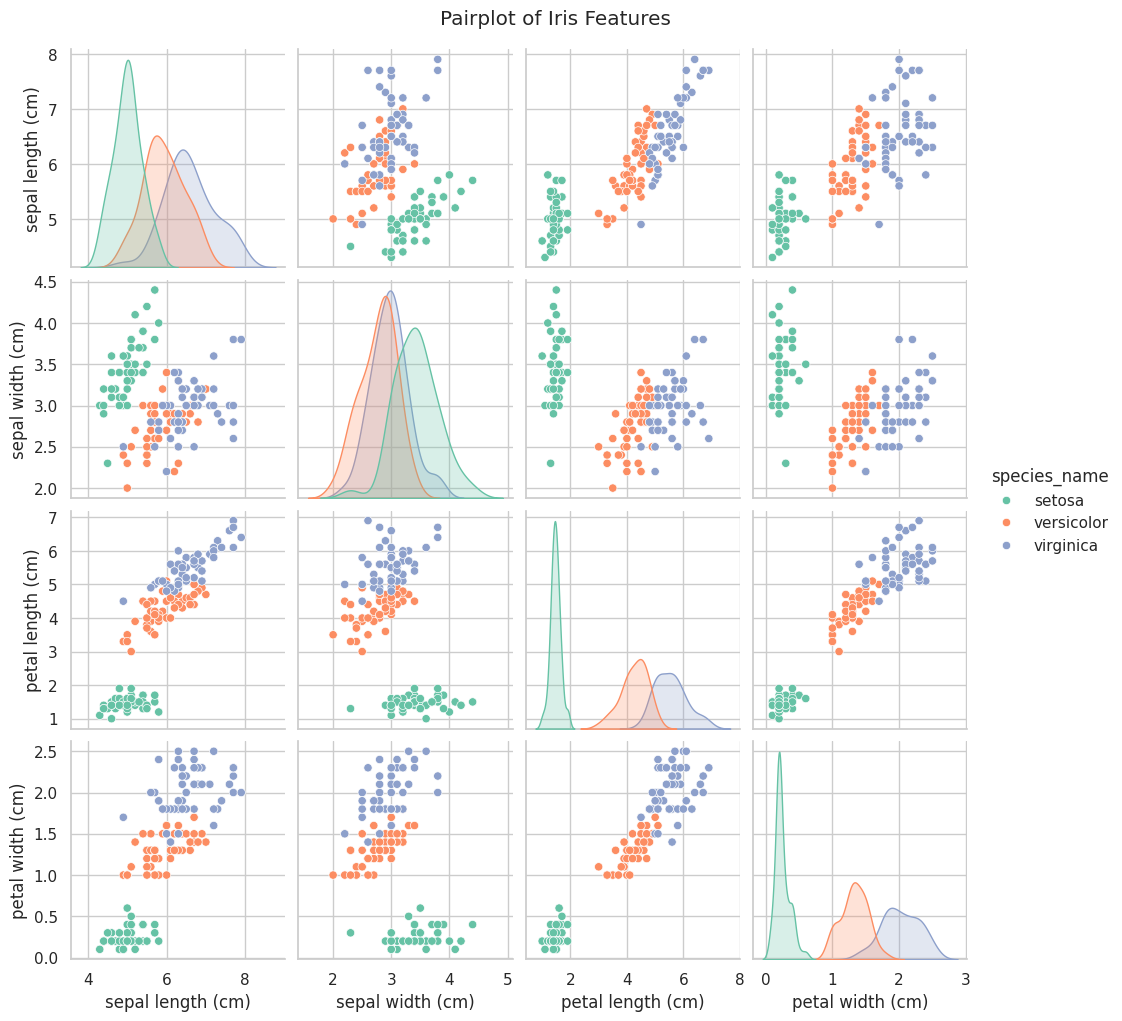

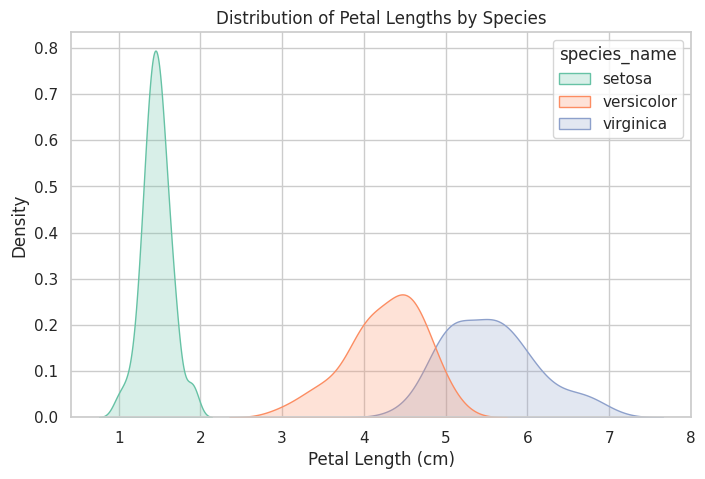

In [6]:
# TASK 1: Import required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Rohith John 24BAD100")
# TASK 2: Load the Iris dataset
# Load the dataset directly from scikit-learn
iris = load_iris()

# Create a Pandas DataFrame for easier data manipulation and visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species_num'] = iris.target
df['species_name'] = df['species_num'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Preview:")
print(df.head(), "\n")

# TASK 3: Split dataset into features (X) and target (y)
# Input Features: Sepal Length, Sepal Width, Petal Length, Petal Width
X = df[iris.feature_names]

# Target Variable: Flower Species
y = df['species_num']

# Split dataset (80% training, 20% testing)
# Stratify=y ensures the 3 classes are evenly distributed in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TASK 4: Train a Gaussian Naïve Bayes classifier
# No hyperparameters usually needed for basic GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# TASK 5: Predict message classes
y_pred = gnb.predict(X_test)

# TASK 6: Evaluate performance
print("--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# VISUALIZATIONS

sns.set_theme(style="whitegrid")

# 1. Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Iris Species Classification')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.show()

# 2. Pairplot to visualize feature separability
# This helps us see why Naïve Bayes performs so well on this dataset
plt.figure(figsize=(8, 8))
sns.pairplot(df.drop('species_num', axis=1), hue='species_name', palette='Set2')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# 3. Gaussian Distribution Assumption check (KDE Plot)
# Let's look at one feature (Petal Length) to see its bell curves per species
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='petal length (cm)', hue='species_name', fill=True, palette='Set2')
plt.title('Distribution of Petal Lengths by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')
plt.show()